In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [3]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/11/2021', end='1/25/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [4]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [13]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 40)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 1200 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[422755.33581809513, 427654.3052563802, 432450.32566678204, 437149.841700235, 441758.6069469874, 446281.7842700146, 450724.02817278286, 455089.55297211726, 459382.189648599, 463605.4335861669, 467762.48492081586, 471856.28284820716, 475889.53495865886, 479864.7424520525, 483784.2219180005, 487650.12423606415, 491464.4510480944, 495229.06917334103, 498945.7232719928, 502616.0470106041, 506241.572940666, 509823.74126728537, 513363.90765688434, 516863.35020979674, 520323.27570460964, 523744.82520530984, 527129.0791091335, 530477.061702013, 533789.7452792486, 537068.0538812269, 540312.866687398, 543525.0211060917, 546705.3155929688, 549854.512226797, 552973.3390677144, 556062.4923201238, 559122.6383197288, 562154.4153619654, 565158.4353871128, 568135.2855356494]


In [14]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [15]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-01-27  422755.335818  6.385299e+06
2021-01-28  427654.305256  6.812954e+06
2021-01-29  432450.325667  7.245404e+06
2021-01-30  437149.841700  7.682554e+06
2021-01-31  441758.606947  8.124312e+06
2021-02-01  446281.784270  8.570594e+06
2021-02-02  450724.028173  9.021318e+06
2021-02-03  455089.552972  9.476408e+06
2021-02-04  459382.189649  9.935790e+06
2021-02-05  463605.433586  1.039940e+07
2021-02-06  467762.484921  1.086716e+07
2021-02-07  471856.282848  1.133901e+07
2021-02-08  475889.534959  1.181490e+07
2021-02-09  479864.742452  1.229477e+07
2021-02-10  483784.221918  1.277855e+07
2021-02-11  487650.124236  1.326620e+07
2021-02-12  491464.451048  1.375767e+07
2021-02-13  495229.069173  1.425290e+07
2021-02-14  498945.723272  1.475184e+07
2021-02-15  502616.047011  1.525446e+07
2021-02-16  506241.572941  1.576070e+07
2021-02-17  509823.741267  1.627052e+07
2021-02-18  513363.907657  1.678389e+07


In [8]:
complete = pd.concat([dataframe, result_df])
print(complete)


                   daily    cumulative
date                                  
2021-01-11  1.000000e+05  1.959151e+06
2021-01-12  1.211290e+05  2.080280e+06
2021-01-13  1.742760e+05  2.254556e+06
2021-01-14  2.398150e+05  2.494371e+06
2021-01-15  2.747930e+05  2.769164e+06
2021-01-16  3.208940e+05  3.090058e+06
2021-01-17  2.754340e+05  3.365492e+06
2021-01-18  1.545640e+05  3.520056e+06
2021-01-19  1.671500e+05  3.687206e+06
2021-01-20  2.983730e+05  3.985579e+06
2021-01-21  3.181510e+05  4.303730e+06
2021-01-22  3.575630e+05  4.661293e+06
2021-01-23  4.244780e+05  5.085771e+06
2021-01-24  6.419220e+05  5.727693e+06
2021-01-25  2.348510e+05  5.962544e+06
2021-01-27  4.383442e+05  6.400888e+06
2021-01-28  4.589423e+05  6.859831e+06
2021-01-29  4.795404e+05  7.339371e+06
2021-01-30  5.001385e+05  7.839510e+06
2021-01-31  5.207366e+05  8.360246e+06
2021-02-01  5.413347e+05  8.901581e+06
2021-02-02  5.619328e+05  9.463514e+06
2021-02-03  5.825309e+05  1.004604e+07
2021-02-04  6.031290e+05 

<Figure size 432x288 with 0 Axes>

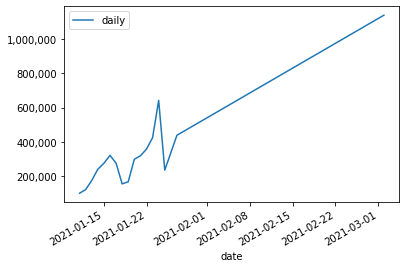

<Figure size 432x288 with 0 Axes>

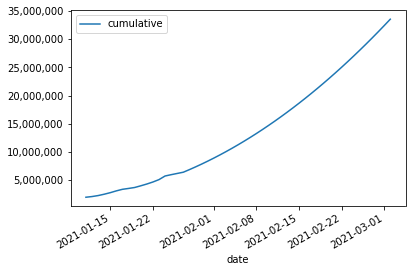

In [9]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

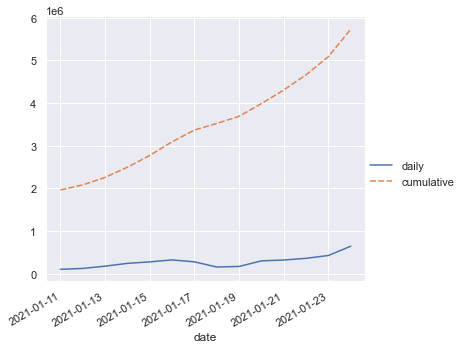

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
